In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataframe = pd.read_csv('drive/MyDrive/DATA 310/Project 2/qsar_fish_toxicity.csv', delimiter = ';' ,names = ['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP','LC50 [-LOG(mol/L)]'])

In [6]:
X = dataframe.iloc[:,:-1].values
y = dataframe.iloc[:,-1].values

In [7]:
scale = StandardScaler()
X_s = scale.fit_transform(X)

In [8]:
n_alphas = 2000
alphas = np.logspace(-5, 6, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_s, y)
    coefs.append(ridge.coef_)

In [9]:
feats = dataframe.columns

In [10]:
[alphas[0]]*len(coefs[0])

[1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05]

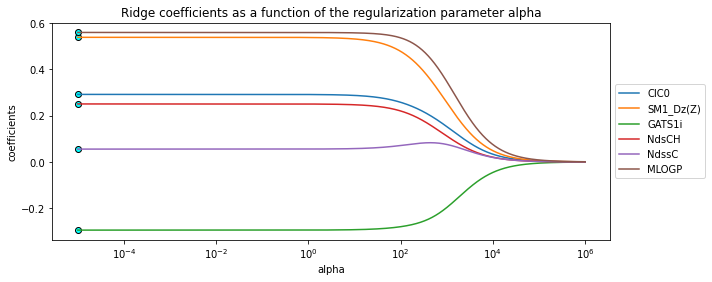

In [11]:
# Display results
plt.figure(figsize=(10, 4))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.scatter([alphas[0]]*len(coefs[0]),coefs[0],ec='k',color='cyan')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge coefficients as a function of the regularization parameter alpha')
plt.axis('tight')
plt.legend(feats[:-1], bbox_to_anchor=[1,0.5], loc='center left')
plt.show()

In [12]:
n_alphas = 2000
alphas = np.logspace(-5, 1.2, n_alphas)

coefs = []
for a in alphas:
    model = Lasso(alpha=a, fit_intercept=False, max_iter=100000)
    model.fit(X_s, y)
    coefs.append(model.coef_)

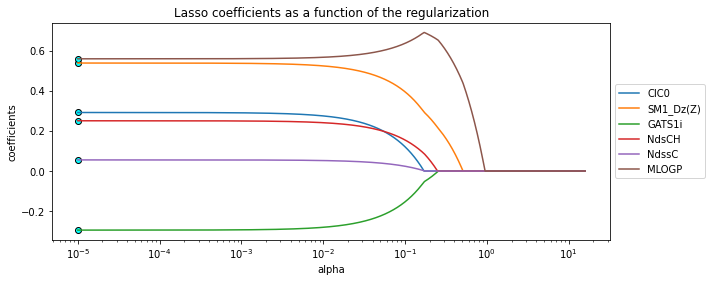

In [13]:
# Display results
plt.figure(figsize=(10, 4))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.scatter([alphas[0]]*len(coefs[0]),coefs[0],ec='k',color='cyan')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(feats[:-1], bbox_to_anchor=[1,0.5], loc='center left')
plt.show()

In [14]:
n_alphas = 2000
alphas = np.logspace(-5, 1.5, n_alphas)

coefs = []
for a in alphas:
    model = ElasticNet(alpha=a, fit_intercept=False, max_iter=100000)
    model.fit(X_s, y)
    coefs.append(model.coef_)

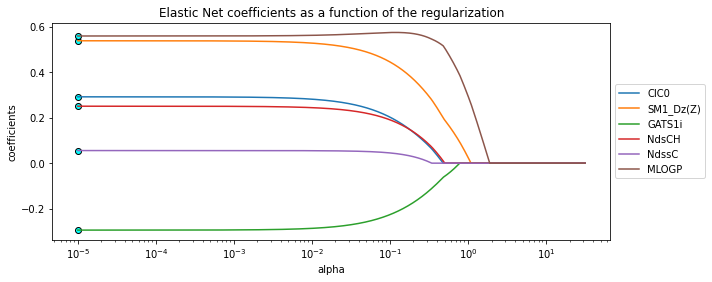

In [15]:
# Display results
plt.figure(figsize=(10, 4))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.scatter([alphas[0]]*len(coefs[0]),coefs[0],ec='k',color='cyan')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Elastic Net coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(feats[:-1], bbox_to_anchor=[1,0.5], loc='center left')
plt.show()